# Capstone Project: Predicting Purchasing Intent from User Behaviour on e-Commerce Platform

# Foreword

Online shopping has experienced major growth in Singapore, with platforms such as Amazon, Lazada, Shopee, Taobao, and many more coming to prominence in recent years. Singapore is a consumer market with high potential for online shopping due to wide-spread high speed internet availability. Furthermore, amidst the ongoing Covid-19 pandemic, prolonged restrictions on in-store retail shopping and travel would undoubtedly shift shopping activity online. These factors underscore how online shopping has established itself as a major retail medium in Singapore. Businesses that are proactive in using the data which comes with online shopping will be able to better utilise their marketing resources to maximise profits. This is the motivation for analysing this eCommerce dataset.

## Scenario: Analysing Electronics eCommerce Website User Activity

## About the Data

- **Citation Request**

This eCommerce dataset was obtained from **Kaggle** and provided by **REES46 Marketing Platform**.

Kaggle Website: https://www.kaggle.com/mkechinov/ecommerce-events-history-in-electronics-store

REES46 Marketing Platform: https://rees46.com/

REES46 Open DCP Project: https://rees46.com/en/open-cdp

- **Title**

eCommerce events history in electronics store

# Step 1: Define the problem or question

- Business question: Can we identify users with purchasing intent from their user session activity to apply targeted marketing strategies and increase purchases? 

- Data question: What features and model best predict user purchasing intent from user session data?

### Features

event_time:	Time when event happened at (in UTC).

event_type:	Only one kind of event: purchase.

product_id:	ID of a product

category_id:	Product's category ID

category_code:	Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.

brand:	Downcased string of brand name. Can be missed.

price:	Float price of a product. Present.

user_id:	Permanent user ID.

user_session:	Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
from IPython import display

In [2]:
sns.set_theme()
sns.set({'figure.figsize':(10,8)})

In [3]:
pd.set_option('display.max_columns', None)

# Step 2: Read, Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
%%time

df = pd.read_csv('events.csv')

Wall time: 1.92 s


In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [6]:
df.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx
885128,2021-02-28 23:59:09 UTC,view,743182,2144415935631458761,construction.tools.soldering,kada,65.08,1515915625556087775,BejOXRngEW


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


### Observation: Null entries observed in cateogry_code, brand, and user_session

 ### <font color = 'blue'>Observation: event_time column has data type object, whereas data type datetime is preferred. The column shall be converted to datetime data type. </font>

In [8]:
%%time

df['event_time'] = pd.to_datetime(df.event_time)

Wall time: 2min 15s


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     885129 non-null  datetime64[ns, UTC]
 1   event_type     885129 non-null  object             
 2   product_id     885129 non-null  int64              
 3   category_id    885129 non-null  int64              
 4   category_code  648910 non-null  object             
 5   brand          672765 non-null  object             
 6   price          885129 non-null  float64            
 7   user_id        885129 non-null  int64              
 8   user_session   884964 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 60.8+ MB


###  <font color = 'green'> Completed: The data type of event_time has been converted to datetime. </font>

### Note: We will work with a small subset of the data as the original data is too large. We'll look at only the October data.

In [10]:
df_oct = df.query('event_time >= "2020-10-01 00:00:00 UTC" & event_time < "2020-11-01 00:00:00 UTC"')

In [11]:
df_oct

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB
...,...,...,...,...,...,...,...,...,...
189613,2020-10-31 23:57:52+00:00,view,4099067,2144415948256314150,computers.peripherals.keyboard,redragon,54.02,1515915625532828178,ip3lXikXju
189614,2020-10-31 23:57:58+00:00,view,4170508,2144415929943982381,electronics.audio.microphone,maono,27.75,1515915625532829086,jRA7B9fjT7
189615,2020-10-31 23:58:46+00:00,view,4079301,2144415922427789416,computers.components.videocards,sapphire,200.35,1515915625532828655,I6y3KjsFeO
189616,2020-10-31 23:59:36+00:00,view,3556361,2144415922427789416,computers.components.videocards,gigabyte,238.16,1515915625532828655,I6y3KjsFeO


### Export the data to csv so that trends over time can be more easily visualised on Tableau

In [12]:
df_oct.to_csv('df_oct.csv')

### Checking out the category id and category code:

In [13]:
df_oct[df_oct['category_id']==2144415927049912542]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
28111,2020-10-01 00:33:34+00:00,view,1168166,2144415927049912542,electronics.video.tv,starwind,105.87,1515915625521281104,SJUH0TBLGD
28179,2020-10-01 01:41:33+00:00,view,1168166,2144415927049912542,electronics.video.tv,starwind,105.87,1515915625521286870,5gpRmZE7nN
28202,2020-10-01 02:00:28+00:00,view,3661285,2144415927049912542,electronics.video.tv,lg,810.68,1515915625521289079,Lc1318z7TC
28293,2020-10-01 03:16:05+00:00,view,1012544,2144415927049912542,electronics.video.tv,starwind,109.84,1515915625521296913,q1HIdNTuZg
28475,2020-10-01 04:55:36+00:00,view,1144765,2144415927049912542,electronics.video.tv,samsung,369.94,1515915625521311832,LxmKw87GUp
...,...,...,...,...,...,...,...,...,...
189440,2020-10-31 21:34:56+00:00,view,1430901,2144415927049912542,electronics.video.tv,lg,631.71,1515915625530703492,d64DIAUvul
189476,2020-10-31 21:58:43+00:00,view,3661285,2144415927049912542,electronics.video.tv,lg,810.68,1515915625532782080,nTQYLHWzYL
189529,2020-10-31 22:34:14+00:00,view,1652956,2144415927049912542,electronics.video.tv,panasonic,494.92,1515915625532795688,3c9EyJ5UbU
189545,2020-10-31 22:45:39+00:00,view,3828501,2144415927049912542,electronics.video.tv,bbk,87.16,1515915625532799632,W9YGAgrSMN


In [14]:
df_oct['category_id'].value_counts().keys().nunique()

651

In [15]:
df_oct['category_code'].value_counts().keys().nunique()

106

### Observation: There are much fewer unique category codes (which show the type of product in clear English) than the unique category_ids (the numbers which should be the same for the same type of product regardless of brand, as shown above for category_id corresponding to electronics.video.tv). This is likely due to there being many null entries in the category code column.

### For our model building later on, if we calculate whether a user has viewed a similar product before, we can work with the category_ids even if the category codes are missing.

### Checking out the distribution of events (view, cart, and purchase):

In [16]:
df_oct.event_type.value_counts()

view        146539
cart          8729
purchase      6276
Name: event_type, dtype: int64

### Observation: The dataset is heavily skewed towards views as compared to cart and purchases. 

### The views and carts will be a key feature for us later in determining what kind of user session activity leads to a purchase.

In [17]:
df_oct.describe(include = 'all')

C:\Users\zaki9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,161544,161544,1.615440e+05,1.615440e+05,113989,119727,161544.000000,1.615440e+05,161515
unique,154758,3,NaN,NaN,106,884,NaN,NaN,95766
top,2020-10-19 19:29:23+00:00,view,NaN,NaN,electronics.telephone,amd,NaN,NaN,56YyVG6SKu
freq,9,146539,NaN,NaN,17308,4441,NaN,NaN,139
first,2020-10-01 00:01:36+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-10-31 23:59:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.734201e+06,2.144424e+18,NaN,NaN,113.703958,1.515916e+18,NaN
std,NaN,NaN,1.397130e+06,6.373812e+14,NaN,NaN,313.662232,2.356181e+07,NaN
min,NaN,NaN,1.050000e+02,2.144416e+18,NaN,NaN,0.370000,1.515916e+18,NaN
25%,NaN,NaN,6.367250e+05,2.144416e+18,NaN,NaN,22.140000,1.515916e+18,NaN


In [18]:
df_oct.user_session.nunique()

95766

### Observation: In the project, we are aiming to analyse user session behaviour data to predict if customers have intent to purchase. The number of unique user sessions is 95766, which is more than half of the total 161544 records. This gives us encouragement that user session data will consist of more than just single views, and will provide useful data for us to build our model with. 

### User sessions with very few actions may indicate that user is only browsing shortly with no real interest, while user sessions with too many actions may indicate frivolous/non-purchasing intent as well. It would be good to understand the user activity within user sessions.

In [19]:
df_oct.user_session.value_counts().unique()

array([139, 100,  94,  91,  86,  84,  81,  71,  70,  68,  67,  65,  62,
        61,  60,  59,  58,  56,  55,  54,  52,  49,  48,  47,  46,  44,
        43,  42,  41,  40,  39,  38,  36,  35,  34,  33,  32,  31,  30,
        29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1], dtype=int64)

### Observation: We see that there are some user sessions which consist of many actions. It's possible that customers may be using bots for some reason, or perhaps the customers left their browsers running for several days without closing them, therefore they are in the same user session. We may be able to tell from the date-time data.

### That also brings us to another question: we need to confirm that each user session has different timestamps for different actions, and not just one timestamp for the entire user session.

### Checking out the user session time data:

In [20]:
df_oct.user_session.value_counts()

56YyVG6SKu                              139
QONOSB9U4b                              100
6kUcodIT7j                               94
a05dfa0e-f13e-47d8-9b4f-db3ec130a57f     91
j6xpHP3qrZ                               86
                                       ... 
PRCHeHLA54                                1
5VlMEgmOLc                                1
spNaBbSMd5                                1
tluhrJ5xVo                                1
7cRvWgjT3I                                1
Name: user_session, Length: 95766, dtype: int64

In [21]:
df_oct[df_oct['user_session']=='56YyVG6SKu']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
121187,2020-10-20 10:55:27+00:00,view,595624,2144415939163062825,auto.accessories.compressor,berkut,149.97,1515915625528204003,56YyVG6SKu
121192,2020-10-20 10:56:25+00:00,view,595676,2144415939163062825,auto.accessories.compressor,berkut,134.14,1515915625528204003,56YyVG6SKu
121197,2020-10-20 10:57:25+00:00,view,595624,2144415939163062825,auto.accessories.compressor,berkut,149.97,1515915625528204003,56YyVG6SKu
121206,2020-10-20 10:58:15+00:00,view,595624,2144415939163062825,auto.accessories.compressor,berkut,149.97,1515915625528204003,56YyVG6SKu
121216,2020-10-20 10:59:27+00:00,view,595624,2144415939163062825,auto.accessories.compressor,berkut,149.97,1515915625528204003,56YyVG6SKu
...,...,...,...,...,...,...,...,...,...
161816,2020-10-27 10:29:25+00:00,view,1400323,2144415926966026460,computers.components.cpu,amd,167.90,1515915625528204003,56YyVG6SKu
161821,2020-10-27 10:30:08+00:00,view,1413338,2144415926966026460,computers.components.cpu,amd,178.22,1515915625528204003,56YyVG6SKu
161822,2020-10-27 10:30:37+00:00,view,1413338,2144415926966026460,computers.components.cpu,amd,178.22,1515915625528204003,56YyVG6SKu
166230,2020-10-28 05:04:06+00:00,view,893196,2144415922427789416,computers.components.videocards,sapphire,214.10,1515915625528204003,56YyVG6SKu


In [22]:
df_oct[df_oct['user_session']=='56YyVG6SKu'].event_type.value_counts()

view        126
cart          7
purchase      6
Name: event_type, dtype: int64

### Observation #1: We see from the above random user session that there are different event times for different actions, which is a good thing. That means we can use the event time variable to analyse different actions in user sessions over time.

### Observation #2: We see that for the above random user session, the event time ranges from 20 October 2020 to 28 October 2020. This indicates that this user has had their browser open constantly and did not exit the user session in all that time. This hinders our hypothesis that we can analyse different user session activity to predict purchasing intent.

### We can check with a few more user ids to see if this issue is prevalent

In [23]:
df_oct[df_oct['user_session']=='QONOSB9U4b']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37960,2020-10-03 07:25:25+00:00,view,1724234,2144415923207929981,auto.accessories.player,jvc,51.40,1515915625444050265,QONOSB9U4b
37976,2020-10-03 07:27:36+00:00,view,3422622,2144415923207929981,auto.accessories.player,acv,34.13,1515915625444050265,QONOSB9U4b
37993,2020-10-03 07:30:48+00:00,view,1144600,2144415923207929981,auto.accessories.player,kenwood,78.37,1515915625444050265,QONOSB9U4b
37997,2020-10-03 07:31:30+00:00,view,672294,2144415923207929981,auto.accessories.player,jvc,95.10,1515915625444050265,QONOSB9U4b
38004,2020-10-03 07:33:15+00:00,view,1135615,2144415923207929981,auto.accessories.player,kenwood,70.25,1515915625444050265,QONOSB9U4b
...,...,...,...,...,...,...,...,...,...
42006,2020-10-04 07:31:39+00:00,view,4078954,2144415923207929981,auto.accessories.player,pioneer,68.10,1515915625444050265,QONOSB9U4b
42007,2020-10-04 07:31:49+00:00,view,940654,2144415923207929981,auto.accessories.player,acv,30.63,1515915625444050265,QONOSB9U4b
42008,2020-10-04 07:32:08+00:00,view,4100976,2144415923207929981,auto.accessories.player,mystery,26.51,1515915625444050265,QONOSB9U4b
42010,2020-10-04 07:32:21+00:00,view,1624694,2144415923207929981,auto.accessories.player,pioneer,64.92,1515915625444050265,QONOSB9U4b


In [24]:
df_oct[df_oct['user_session']=='6kUcodIT7j']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
96133,2020-10-16 04:15:13+00:00,view,3967707,2144415922427789416,computers.components.videocards,gigabyte,672.63,1515915625526571951,6kUcodIT7j
96138,2020-10-16 04:18:02+00:00,view,3829445,2144415922427789416,computers.components.videocards,gigabyte,591.59,1515915625526571951,6kUcodIT7j
96141,2020-10-16 04:19:56+00:00,view,3791403,2144415926966026460,computers.components.cpu,amd,236.97,1515915625526571951,6kUcodIT7j
96142,2020-10-16 04:20:18+00:00,view,3791402,2144415926966026460,computers.components.cpu,amd,253.51,1515915625526571951,6kUcodIT7j
96143,2020-10-16 04:20:33+00:00,view,3791403,2144415926966026460,computers.components.cpu,amd,236.97,1515915625526571951,6kUcodIT7j
...,...,...,...,...,...,...,...,...,...
99798,2020-10-16 15:40:06+00:00,view,3792149,2144415924491387038,computers.components.motherboard,asrock,185.14,1515915625526571951,6kUcodIT7j
99804,2020-10-16 15:41:21+00:00,view,3791403,2144415926966026460,computers.components.cpu,amd,236.97,1515915625526571951,6kUcodIT7j
99924,2020-10-16 16:04:17+00:00,view,3829445,2144415922427789416,computers.components.videocards,gigabyte,591.59,1515915625526571951,6kUcodIT7j
99946,2020-10-16 16:07:35+00:00,view,1012906,2144415922402623591,computers.peripherals.monitor,NaN,278.41,1515915625526571951,6kUcodIT7j


In [25]:
df_oct[df_oct['user_session']=='a05dfa0e-f13e-47d8-9b4f-db3ec130a57f']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
36885,2020-10-02 20:35:45+00:00,view,1401728,2144415926185885895,construction.tools.drill,hyundai,82.49,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
37307,2020-10-03 00:15:40+00:00,view,564621,2144415935631458761,construction.tools.soldering,lukey,72.38,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
37312,2020-10-03 00:19:05+00:00,view,564617,2144415935631458761,construction.tools.soldering,NaN,58.25,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
37313,2020-10-03 00:20:41+00:00,view,743216,2144415935631458761,construction.tools.soldering,NaN,170.95,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
37314,2020-10-03 00:25:32+00:00,view,3634391,2144415935631458761,construction.tools.soldering,w.e.p,212.10,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
...,...,...,...,...,...,...,...,...,...
142939,2020-10-24 04:30:16+00:00,view,564619,2144415935631458761,construction.tools.soldering,NaN,68.57,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
145188,2020-10-24 12:39:07+00:00,view,1401728,2144415926185885895,construction.tools.drill,hyundai,82.49,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
157688,2020-10-26 16:45:14+00:00,view,1401728,2144415926185885895,construction.tools.drill,hyundai,82.49,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f
157858,2020-10-26 17:24:05+00:00,view,564621,2144415935631458761,construction.tools.soldering,lukey,72.38,1515915625367438020,a05dfa0e-f13e-47d8-9b4f-db3ec130a57f


### Observation: From the user ids above, the issue of one user session spanning across different dates does seem to be prevalent.

### <font color = 'red'> Insight: Since we can no longer assume that distinct user sessions can represent distinct user browsing/purchasing periods, we may need to use the different dates that the users used the website as a proxy for distinct user browsing/purchasing periods. </font>

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

## Step 5.1: We need to first split the event_time into date and time, because we will use the different dates on which users visited the website as the different browsing/purchasing sessions (since user_session is unreliable).

In [26]:
df_oct = df_oct.copy()

In [27]:
df_oct['date'] = [d.date() for d in df_oct['event_time']]
df_oct['time'] = [d.time() for d in df_oct['event_time']]

In [28]:
df_oct

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,00:01:36
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,00:04:11
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,00:07:23
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,00:07:56
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,00:08:11
...,...,...,...,...,...,...,...,...,...,...,...
189613,2020-10-31 23:57:52+00:00,view,4099067,2144415948256314150,computers.peripherals.keyboard,redragon,54.02,1515915625532828178,ip3lXikXju,2020-10-31,23:57:52
189614,2020-10-31 23:57:58+00:00,view,4170508,2144415929943982381,electronics.audio.microphone,maono,27.75,1515915625532829086,jRA7B9fjT7,2020-10-31,23:57:58
189615,2020-10-31 23:58:46+00:00,view,4079301,2144415922427789416,computers.components.videocards,sapphire,200.35,1515915625532828655,I6y3KjsFeO,2020-10-31,23:58:46
189616,2020-10-31 23:59:36+00:00,view,3556361,2144415922427789416,computers.components.videocards,gigabyte,238.16,1515915625532828655,I6y3KjsFeO,2020-10-31,23:59:36


## Step 5.2 Engineer potential features which reflect purchasing intent. Preliminary features include duration of website usage, the number of view/cart actions for the most browsed type of product (identified via category id) and the number of items added to the cart. Each of these three features are arguable indications that the user has significant intent to purchase a product.

## By assuming that each set of daily activities for each customer is a different user session, we will have multiple dates/user session per customer as our rows.

## We will also create a target column indicating if the user eventually purchased a product or not

## We will create several other columns such as cart value and purchase value not for model building but for business purposes later on

In [29]:
def date_activity_data(data):
    users = data['user_id'].unique()
    separator = '_'
    user_date_indices = []
    duration = []
    top_cat = []
    top_cat_viewsandcarts = []
    cart_quantity = []
    purchased = []
    purchase_value = []
    cart_value = []
    for user in users:
        user_data = data[data['user_id']==user]
        for date in user_data['date'].unique():
            date_data = user_data[user_data['date']==date]
            user_date_indices.append(separator.join([str(user),str(date)]))
            duration.append((date_data.event_time.values[-1]-date_data.event_time.values[0]))
            top_cat.append(date_data.category_id.value_counts().index[0])
            top_cat_viewsandcarts.append(date_data.category_id.value_counts().values[0])
            if 'cart' in date_data.event_type.value_counts():
                cart_quantity.append(date_data.event_type.value_counts()['cart'])
            else:
                cart_quantity.append(0)
            if 'purchase' in date_data.event_type.value_counts():
                purchased.append(1)
                purchase_value.append(date_data[date_data['event_type']=='purchase'].price.sum())
            else:
                purchased.append(0)
                purchase_value.append(0)
            if 'cart' in date_data.event_type.value_counts():
                cart_value.append(date_data[date_data['event_type']=='cart'].price.sum())
            else:
                cart_value.append(0)
    dataframe_dict = {'Duration':duration,'Top_Category_ID':top_cat,
                      'Top Category Views and Carts Count':top_cat_viewsandcarts,
                     'Cart_Quantity':cart_quantity, 'Purchased':purchased,
                     'Purchase_Value': purchase_value, 'Cart Value': cart_value}
    date_activity_df = pd.DataFrame(data=dataframe_dict, index = user_date_indices)
    return date_activity_df

In [30]:
%%time

user_date_activity = date_activity_data(df_oct)

Wall time: 7min 32s


In [31]:
user_date_activity

,Duration,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value
1515915625520113390_2020-10-01,0 days 00:26:00,2144415922360680550,4,0,0,0.0,0.0
1515915625520113390_2020-10-04,0 days 01:54:40,2144415922360680550,2,0,0,0.0,0.0
1515915625521278799_2020-10-01,0 days 00:00:00,2144415925011480748,1,0,0,0.0,0.0
1515915625521278938_2020-10-01,0 days 00:43:09,2144415921169498184,2,0,0,0.0,0.0
1515915625521279091_2020-10-01,0 days 00:00:00,2144415926806642904,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...
1515915625532828906_2020-10-31,0 days 00:00:04,2144415921932861531,2,0,0,0.0,0.0
1515915625532829197_2020-10-31,0 days 00:00:00,2144415922528452715,1,0,0,0.0,0.0
1515915625532829009_2020-10-31,0 days 00:00:00,2144415926932472027,1,0,0,0.0,0.0
1515915625532829086_2020-10-31,0 days 00:00:00,2144415929943982381,1,0,0,0.0,0.0


In [32]:
user_date_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92277 entries, 1515915625520113390_2020-10-01 to 1515915625532830097_2020-10-31
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Duration                            92277 non-null  timedelta64[ns]
 1   Top_Category_ID                     92277 non-null  int64          
 2   Top Category Views and Carts Count  92277 non-null  int64          
 3   Cart_Quantity                       92277 non-null  int64          
 4   Purchased                           92277 non-null  int64          
 5   Purchase_Value                      92277 non-null  float64        
 6   Cart Value                          92277 non-null  float64        
dtypes: float64(2), int64(4), timedelta64[ns](1)
memory usage: 5.6+ MB


### Note: The duration values are of data type timedelta, which are not usable for training the models. We need to convert them to seconds.

In [33]:
%%time

user_date_activity['Duration_seconds'] = user_date_activity['Duration'].apply(lambda x : x.total_seconds())

Wall time: 814 ms


In [34]:
user_date_activity

,Duration,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value,Duration_seconds
1515915625520113390_2020-10-01,0 days 00:26:00,2144415922360680550,4,0,0,0.0,0.0,1560.0
1515915625520113390_2020-10-04,0 days 01:54:40,2144415922360680550,2,0,0,0.0,0.0,6880.0
1515915625521278799_2020-10-01,0 days 00:00:00,2144415925011480748,1,0,0,0.0,0.0,0.0
1515915625521278938_2020-10-01,0 days 00:43:09,2144415921169498184,2,0,0,0.0,0.0,2589.0
1515915625521279091_2020-10-01,0 days 00:00:00,2144415926806642904,1,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1515915625532828906_2020-10-31,0 days 00:00:04,2144415921932861531,2,0,0,0.0,0.0,4.0
1515915625532829197_2020-10-31,0 days 00:00:00,2144415922528452715,1,0,0,0.0,0.0,0.0
1515915625532829009_2020-10-31,0 days 00:00:00,2144415926932472027,1,0,0,0.0,0.0,0.0
1515915625532829086_2020-10-31,0 days 00:00:00,2144415929943982381,1,0,0,0.0,0.0,0.0


In [35]:
user_date_activity = user_date_activity.drop('Duration', axis = 1)

In [36]:
user_date_activity[user_date_activity['Purchased']==1]

,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value,Duration_seconds
1515915625521279407_2020-10-01,2144415938886238754,7,1,1,54.60,27.30,1194.0
1515915625521280982_2020-10-01,2144415922528452715,1,0,1,19.52,0.00,0.0
1515915625521281502_2020-10-01,2144415930019479855,4,2,1,82.22,41.11,147.0
1515915625521283624_2020-10-01,2144415922872385653,4,1,1,66.10,66.10,375.0
1515915625519756191_2020-10-01,2144415927318348006,15,1,1,107.33,107.33,53702.0
...,...,...,...,...,...,...,...
1515915625532767502_2020-10-31,2144415942703055498,3,1,1,159.68,159.68,197.0
1515915625532777414_2020-10-31,2144415926445932750,9,1,1,378.81,126.27,6446.0
1515915625532777769_2020-10-31,2144415923107266682,3,1,1,163.52,163.52,322.0
1515915625527676347_2020-10-31,2144415928811520270,8,2,1,87.66,58.44,759.0


In [37]:
user_date_activity[user_date_activity['Purchased']==0]

,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value,Duration_seconds
1515915625520113390_2020-10-01,2144415922360680550,4,0,0,0.0,0.0,1560.0
1515915625520113390_2020-10-04,2144415922360680550,2,0,0,0.0,0.0,6880.0
1515915625521278799_2020-10-01,2144415925011480748,1,0,0,0.0,0.0,0.0
1515915625521278938_2020-10-01,2144415921169498184,2,0,0,0.0,0.0,2589.0
1515915625521279091_2020-10-01,2144415926806642904,1,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1515915625532828906_2020-10-31,2144415921932861531,2,0,0,0.0,0.0,4.0
1515915625532829197_2020-10-31,2144415922528452715,1,0,0,0.0,0.0,0.0
1515915625532829009_2020-10-31,2144415926932472027,1,0,0,0.0,0.0,0.0
1515915625532829086_2020-10-31,2144415929943982381,1,0,0,0.0,0.0,0.0


### Observation: Severe class imbalance of our target variable.

### Confirming that there are indeed sessions where users put products into their carts but did not eventually purchase them

In [38]:
user_date_activity.query('Cart_Quantity>0 & Purchased ==0')

,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value,Duration_seconds
1515915625521280777_2020-10-01,2144415922528452715,2,1,0,0.0,19.52,86.0
1515915625521284661_2020-10-01,2144415924491387038,5,1,0,0.0,159.14,2294.0
1515915625521284661_2020-10-02,2144415924491387038,9,1,0,0.0,159.14,37781.0
1515915625521288538_2020-10-01,2144415939716710969,2,1,0,0.0,304.41,23.0
1515915625521291121_2020-10-01,2144415925011480748,3,1,0,0.0,26.19,380.0
...,...,...,...,...,...,...,...
1515915625532791348_2020-10-31,2144415923384090754,2,1,0,0.0,12.46,61.0
1515915625500091266_2020-10-31,2144415926890528986,2,1,0,0.0,54.95,20.0
1515915625532799536_2020-10-31,2144415926445932750,6,2,0,0.0,285.40,447.0
1515915625532803604_2020-10-31,2144415924491387038,2,1,0,0.0,81.14,43.0


In [39]:
user_date_activity.loc[user_date_activity.index.str.startswith('1515915625521284661')]

,Top_Category_ID,Top Category Views and Carts Count,Cart_Quantity,Purchased,Purchase_Value,Cart Value,Duration_seconds
1515915625521284661_2020-10-01,2144415924491387038,5,1,0,0.0,159.14,2294.0
1515915625521284661_2020-10-02,2144415924491387038,9,1,0,0.0,159.14,37781.0
1515915625521284661_2020-10-03,2144415922427789416,4,0,0,0.0,0.00,39650.0


### Total Purchase Revenue

In [40]:
user_date_activity[user_date_activity['Purchased']==1].Purchase_Value.sum()

562590.39

In [41]:
np.average(user_date_activity[user_date_activity['Purchased']==1].Purchase_Value)

141.24790107958825

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [42]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [43]:
final_data = user_date_activity.drop(['Top_Category_ID', 'Purchase_Value', 'Cart Value'], axis = 1)

### Note: We will not rebalance the classes even though there is considerable class imbalance. This is because several assumptions have been made in feature engineering – better to avoid more assumptions/synthetic data to better estimate algorithm performance on real validation data. This is in line with Occam’s Razor. We can re-examine class rebalancing after seeing the performance of our models.

Assumptions during feature engineering:
1. Daily user activity used as proxy for continuous, distinct user session no matter what time first and last transaction are.
2. Assume that most frequently browsed category ID is the item that is purchased. Reason is that if we introduce a variable for whether the most frequently browsed product is the item purchased, the value for non-purchases will always be undefined/null.

In [44]:
X = final_data[[c for c in final_data.columns if c != 'Purchased']]
y = final_data['Purchased']

In [45]:
X

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds
1515915625520113390_2020-10-01,4,0,1560.0
1515915625520113390_2020-10-04,2,0,6880.0
1515915625521278799_2020-10-01,1,0,0.0
1515915625521278938_2020-10-01,2,0,2589.0
1515915625521279091_2020-10-01,1,0,0.0
...,...,...,...
1515915625532828906_2020-10-31,2,0,4.0
1515915625532829197_2020-10-31,1,0,0.0
1515915625532829009_2020-10-31,1,0,0.0
1515915625532829086_2020-10-31,1,0,0.0


In [46]:
y

1515915625520113390_2020-10-01    0
1515915625520113390_2020-10-04    0
1515915625521278799_2020-10-01    0
1515915625521278938_2020-10-01    0
1515915625521279091_2020-10-01    0
                                 ..
1515915625532828906_2020-10-31    0
1515915625532829197_2020-10-31    0
1515915625532829009_2020-10-31    0
1515915625532829086_2020-10-31    0
1515915625532830097_2020-10-31    0
Name: Purchased, Length: 92277, dtype: int64

In [47]:
y.value_counts()

0    88294
1     3983
Name: Purchased, dtype: int64

## Split into train-validation, and test datasets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 0)

In [49]:
y_train.value_counts()

0    70635
1     3186
Name: Purchased, dtype: int64

In [50]:
y_test.value_counts()

0    17659
1      797
Name: Purchased, dtype: int64

## 6.1: Random Forest Train CV

In [51]:
%%time

rf_cv = cross_validate(RandomForestClassifier(random_state = 0), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 10.4 s


In [52]:
pickle_out = open("rf_cv.p", "wb" )
pickle.dump(rf_cv, pickle_out)
pickle_out.close()

In [53]:
rf_cv_df = pd.DataFrame(rf_cv)
rf_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,1.863062,0.155542,"(DecisionTreeClassifier(max_features='auto', r...",0.969116,0.641066,0.643082
1,1.887988,0.148565,"(DecisionTreeClassifier(max_features='auto', r...",0.971823,0.664050,0.676800
2,1.908893,0.155581,"(DecisionTreeClassifier(max_features='auto', r...",0.970266,0.682889,0.647321
3,1.918869,0.158574,"(DecisionTreeClassifier(max_features='auto', r...",0.972027,0.665620,0.679487
4,1.979671,0.151595,"(DecisionTreeClassifier(max_features='auto', r...",0.969927,0.620094,0.661642


In [54]:
print('Mean Accuracy score: ', rf_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', rf_cv_df['test_recall'].mean())
print('Mean Precision score: ', rf_cv_df['test_precision'].mean())
print('Mean Model training time: ', rf_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9706316836067046
Mean Recall score:  0.6547437783890986
Mean Precision score:  0.6616663820206846
Mean Model training time:  1.9116966247558593 seconds


## 6.2 Logistic Regression Train CV

In [55]:
%%time

lr_cv = cross_validate(LogisticRegression(random_state = 0), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 1.76 s


In [56]:
pickle_out = open("lr_cv.p", "wb" )
pickle.dump(lr_cv, pickle_out)
pickle_out.close()

In [57]:
lr_cv_df = pd.DataFrame(lr_cv)
lr_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,0.317117,0.012000,LogisticRegression(random_state=0),0.963698,0.297806,0.683453
1,0.331114,0.011816,LogisticRegression(random_state=0),0.963560,0.277865,0.694118
2,0.327573,0.014961,LogisticRegression(random_state=0),0.964305,0.313972,0.689655
3,0.345075,0.011933,LogisticRegression(random_state=0),0.963018,0.277865,0.673004
4,0.342793,0.016954,LogisticRegression(random_state=0),0.960512,0.244898,0.604651


In [58]:
print('Mean Accuracy score: ', lr_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', lr_cv_df['test_recall'].mean())
print('Mean Precision score: ', lr_cv_df['test_precision'].mean())
print('Mean Model training time: ', lr_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9630186440268993
Mean Recall score:  0.28248106573229725
Mean Precision score:  0.6689762043909511
Mean Model training time:  0.3327342987060547 seconds


## 6.3 Naive Bayes Train CV

In [59]:
%%time

nb_cv = cross_validate(GaussianNB(), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 181 ms


In [60]:
pickle_out = open("nb_cv.p", "wb" )
pickle.dump(nb_cv, pickle_out)
pickle_out.close()

In [61]:
nb_cv_df = pd.DataFrame(nb_cv)
nb_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,0.022936,0.012964,GaussianNB(),0.951101,0.700627,0.457055
1,0.017982,0.012969,GaussianNB(),0.954484,0.558870,0.476573
2,0.017957,0.012964,GaussianNB(),0.955500,0.726845,0.489429
3,0.019910,0.011965,GaussianNB(),0.951571,0.514914,0.446866
4,0.018947,0.011968,GaussianNB(),0.948523,0.507064,0.420026


In [62]:
print('Mean Accuracy score: ', nb_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', nb_cv_df['test_recall'].mean())
print('Mean Precision score: ', nb_cv_df['test_precision'].mean())
print('Mean Model training time: ', nb_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.952235829035821
Mean Recall score:  0.6016638533879913
Mean Precision score:  0.45798996830324945
Mean Model training time:  0.01954641342163086 seconds


## 6.4 Decision Tree Train CV

In [63]:
%%time

dt_cv = cross_validate(DecisionTreeClassifier(random_state = 0), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 300 ms


In [64]:
pickle_out = open("dt_cv.p", "wb" )
pickle.dump(dt_cv, pickle_out)
pickle_out.close()

In [65]:
dt_cv_df = pd.DataFrame(dt_cv)
dt_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,0.043878,0.012966,DecisionTreeClassifier(random_state=0),0.969116,0.611285,0.652174
1,0.040888,0.012968,DecisionTreeClassifier(random_state=0),0.970536,0.618524,0.672355
2,0.042881,0.015958,DecisionTreeClassifier(random_state=0),0.969927,0.634223,0.656911
3,0.039892,0.014960,DecisionTreeClassifier(random_state=0),0.970875,0.604396,0.683837
4,0.041888,0.011967,DecisionTreeClassifier(random_state=0),0.968708,0.574568,0.657092


In [66]:
print('Mean Accuracy score: ', dt_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', dt_cv_df['test_recall'].mean())
print('Mean Precision score: ', dt_cv_df['test_precision'].mean())
print('Mean Model training time: ', dt_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9698324422087096
Mean Recall score:  0.6085992824909081
Mean Precision score:  0.6644735165183271
Mean Model training time:  0.04188547134399414 seconds


## 6.5 AdaBoost Train CV

In [67]:
%%time

ab_cv = cross_validate(AdaBoostClassifier(random_state = 0), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 5.35 s


In [68]:
pickle_out = open("ab_cv.p", "wb" )
pickle.dump(ab_cv, pickle_out)
pickle_out.close()

In [69]:
ab_cv_df = pd.DataFrame(ab_cv)
ab_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,0.946465,0.104721,"(DecisionTreeClassifier(max_depth=1, random_st...",0.975212,0.833856,0.671717
1,0.933533,0.099741,"(DecisionTreeClassifier(max_depth=1, random_st...",0.975142,0.788069,0.683924
2,1.088051,0.096741,"(DecisionTreeClassifier(max_depth=1, random_st...",0.974262,0.810047,0.665806
3,0.933505,0.098736,"(DecisionTreeClassifier(max_depth=1, random_st...",0.975481,0.788069,0.688615
4,0.923523,0.101763,"(DecisionTreeClassifier(max_depth=1, random_st...",0.975278,0.813187,0.678010


In [70]:
print('Mean Accuracy score: ', ab_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', ab_cv_df['test_recall'].mean())
print('Mean Precision score: ', ab_cv_df['test_precision'].mean())
print('Mean Model training time: ', ab_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9750748413485617
Mean Recall score:  0.8066455711775908
Mean Precision score:  0.6776144681445453
Mean Model training time:  0.9650154113769531 seconds


## 6.6 XGBoost Train CV

In [71]:
%%time

xgb_cv = cross_validate(xgb.XGBClassifier(random_state=0, learning_rate=0.01,
                                          eval_metric = 'logloss', use_label_encoder = False),
                        X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

Wall time: 8.21 s


In [72]:
pickle_out = open("xgb_cv.p", "wb" )
pickle.dump(xgb_cv, pickle_out)
pickle_out.close()

In [73]:
xgb_cv_df = pd.DataFrame(xgb_cv)
xgb_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,1.611689,0.033910,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.976634,0.904389,0.670151
1,1.615680,0.032913,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.977242,0.874411,0.685117
2,1.555092,0.031914,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.976632,0.901099,0.670561
3,1.644601,0.033911,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.977310,0.883830,0.683252
4,1.579775,0.032911,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.976497,0.894819,0.670588


In [74]:
print('Mean Accuracy score: ', xgb_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', xgb_cv_df['test_recall'].mean())
print('Mean Precision score: ', xgb_cv_df['test_precision'].mean())
print('Mean Model training time: ', xgb_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9768629553788731
Mean Recall score:  0.8917097680644478
Mean Precision score:  0.6759338497069609
Mean Model training time:  1.6013673305511475 seconds


## 6.7 SVM

In [75]:
%%time

svm_cv = cross_validate(LinearSVC(max_iter = 10000, random_state = 0), X = X_train, y = np.ravel(y_train), cv=5,
                      scoring=('accuracy','recall','precision'), return_estimator = True)

C:\Users\zaki9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zaki9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zaki9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zaki9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Wall time: 3min 58s


C:\Users\zaki9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
pickle_out = open("svm_cv.p", "wb" )
pickle.dump(svm_cv, pickle_out)
pickle_out.close()

In [77]:
svm_cv_df = pd.DataFrame(svm_cv)
svm_cv_df

,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision
0,47.292512,0.011824,"LinearSVC(max_iter=10000, random_state=0)",0.959770,0.158307,0.639241
1,47.272640,0.013462,"LinearSVC(max_iter=10000, random_state=0)",0.930981,0.452119,0.300626
2,48.137829,0.014998,"LinearSVC(max_iter=10000, random_state=0)",0.960783,0.124019,0.790000
3,48.243416,0.014354,"LinearSVC(max_iter=10000, random_state=0)",0.859455,0.926217,0.225363
4,47.925966,0.012066,"LinearSVC(max_iter=10000, random_state=0)",0.956380,0.012559,0.347826


In [78]:
print('Mean Accuracy score: ', svm_cv_df['test_accuracy'].mean())
print('Mean Recall score: ', svm_cv_df['test_recall'].mean())
print('Mean Precision score: ', svm_cv_df['test_precision'].mean())
print('Mean Model training time: ', svm_cv_df['fit_time'].mean(), 'seconds')

Mean Accuracy score:  0.9334738584431632
Mean Recall score:  0.3346441735604297
Mean Precision score:  0.4606111541018004
Mean Model training time:  47.77447276115417 seconds


###  <font color = 'red'> Insight: Xgboost performed the best, followed by AdaBoost, then Random Forest. We will proceed to tune the XGBoost model since it performs 10% better than the Adaboost model </font>

# Step 7: Hyperparameter Tuning

In [79]:
xgb_gs = GridSearchCV(xgb.XGBClassifier(random_state=0, eval_metric = 'logloss', use_label_encoder = False),
                     param_grid={'n_estimators': (50, 100, 200, 300),
                                'max_depth': (3,6,10),
                                'learning_rate':(0.01,0.05,0.1, 0.2)},                                                        
                     scoring=('accuracy','recall','precision','roc_auc'),
                     cv = 5, refit = False)

In [80]:
%%time

xgb_gs.fit(X_train, np.ravel(y_train))

Wall time: 12min 9s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                       

In [81]:
pickle_out = open("xgb_gs.p", "wb" )
pickle.dump(xgb_gs, pickle_out)
pickle_out.close()

In [82]:
xgb_gs_results = pd.DataFrame(xgb_gs.cv_results_)
xgb_gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.535426,0.003643,0.044480,0.000798,0.01,3,50,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975008,0.974939,0.974329,0.976158,0.975075,0.975102,0.000591,44,0.951411,0.915228,0.926217,0.927786,0.924647,0.929058,0.012001,1,0.642328,0.648498,0.639913,0.658863,0.647965,0.647513,0.006552,48,0.974666,0.962825,0.972652,0.969486,0.973153,0.970556,0.004218,44
1,1.037241,0.010271,0.050678,0.002155,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975415,0.975752,0.974871,0.977039,0.975075,0.975630,0.000765,39,0.938871,0.905808,0.921507,0.921507,0.924647,0.922468,0.010519,2,0.648971,0.659429,0.646476,0.670091,0.647965,0.654586,0.009000,47,0.975091,0.962881,0.973432,0.970119,0.973179,0.970941,0.004338,39
2,2.093827,0.014620,0.060837,0.003568,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975483,0.975752,0.974939,0.977039,0.975210,0.975684,0.000729,38,0.938871,0.905808,0.921507,0.919937,0.916797,0.920584,0.010662,3,0.649675,0.659429,0.647189,0.670481,0.651059,0.655566,0.008515,46,0.974245,0.962925,0.973675,0.970188,0.973282,0.970863,0.004211,41
3,3.147484,0.019143,0.071808,0.003277,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975618,0.975887,0.975007,0.977242,0.975481,0.975847,0.000754,33,0.938871,0.905808,0.921507,0.919937,0.916797,0.920584,0.010662,3,0.651087,0.660939,0.647903,0.672790,0.653975,0.657339,0.008845,44,0.974594,0.964165,0.973719,0.970144,0.973261,0.971177,0.003814,37
4,0.818012,0.032320,0.044681,0.000746,0.01,6,50,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.976566,0.977039,0.976768,0.977377,0.976632,0.976877,0.000298,5,0.902821,0.872841,0.894819,0.886970,0.899529,0.891396,0.010698,9,0.669767,0.683047,0.673759,0.683192,0.670960,0.676145,0.005840,38,0.975232,0.963025,0.973549,0.969994,0.973830,0.971126,0.004403,38
5,1.568121,0.014131,0.051463,0.001018,0.01,6,100,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.976634,0.977242,0.976632,0.977310,0.976497,0.976863,0.000341,6,0.904389,0.874411,0.901099,0.883830,0.894819,0.891710,0.011135,8,0.670151,0.685117,0.670561,0.683252,0.670588,0.675934,0.006764,39,0.975661,0.963300,0.974256,0.970680,0.974081,0.971596,0.004460,32
6,3.315346,0.101840,0.061038,0.000977,0.01,6,200,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.976228,0.977377,0.976768,0.977377,0.977106,0.976971,0.000434,1,0.884013,0.872841,0.901099,0.880691,0.896389,0.887007,0.010355,10,0.670630,0.687268,0.672131,0.684982,0.677343,0.678471,0.006674,32,0.974719,0.963478,0.974609,0.970578,0.974543,0.971586,0.004346,33
7,5.044040,0.104651,0.075598,0.003420,0.01,6,300,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.976498,0.977445,0.976700,0.976565,0.977039,0.976849,0.000351,7,0.882445,0.872841,0.896389,0.861852,0.896389,0.881984,0.013447,13,0.674251,0.688119,0.672556,0.680297,0.676540,0.678353,0.005529,34,0.975167,0.966295,0.974713,0.970665,0.974645,0.972297,0.003414,23
8,1.220149,0.013106,0.046477,0.001017,0.01,10,50,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.975618,0.976768,0.975549,0.975752,0.976700,0.976077,0.000541,29,0.865204,0.850863,0.847724,0.825746,0.883830,0.854673,0.019291,26,0.668281,0.686076,0.671642,0.680466,0.675870,0.676467,0.006308,37,0.975324,0.963131,0.973257,0.970188,0.974146

In [83]:
xgb_gs_results[['params',
                'mean_fit_time',
                'mean_test_accuracy',
                'rank_test_accuracy',
                'mean_test_recall',
                'rank_test_recall',
                'mean_test_precision',
                'rank_test_precision']].sort_values('rank_test_recall')

,params,mean_fit_time,mean_test_accuracy,rank_test_accuracy,mean_test_recall,rank_test_recall,mean_test_precision,rank_test_precision
0,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.535426,0.975102,44,0.929058,1,0.647513,48
1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",1.037241,0.975630,39,0.922468,2,0.654586,47
2,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",2.093827,0.975684,38,0.920584,3,0.655566,46
3,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",3.147484,0.975847,33,0.920584,3,0.657339,44
12,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.548134,0.975712,37,0.920584,3,0.655868,45
13,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",1.089787,0.975888,32,0.919956,6,0.657959,43
24,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.567482,0.975928,30,0.917446,7,0.658964,42
5,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",1.568121,0.976863,6,0.891710,8,0.675934,39
4,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.818012,0.976877,5,0.891396,9,0.676145,38
6,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",3.315346,0.976971,1,0.887007,10,0.678471,32


In [84]:
xgb_gs_results[['params',
                'mean_fit_time',
                'mean_test_accuracy',
                'rank_test_accuracy',
                'mean_test_recall',
                'rank_test_recall',
                'mean_test_precision',
                'rank_test_precision']].sort_values('rank_test_recall').params[0]

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

###  For our problem statement, our objective in building the model is to achieve a high recall score. This is because we would like to identify purchasing intent with high accuracy and apply the appropriate marketing strategy to secure the purchases. Therefore we are looking for a high rate of True Positives, and low False Negatives.

### On the other hand, the impact of True Negatives and False Positives is minimal. These are user sessions which the model has predicted have high user intent, but the user has not made a purchase. However, in reality, users may not purchase for a variety of reasons, such as a cheaper alternative elsewhere, or exorbitant checkout fees. Therefore False Positives do not signal that the model is performing poorly.

### Examining the mean test recall of the hyperparmater-tuned XGBoost models, it was found that the parameters of {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50} were found to produce the best mean test recall (0.929058). We will use this XGBoost model on our test data and examine the results.

# Step 8: Test on the test dataset

## XGBoost Test (baseline hyperparameters)

In [85]:
%%time

xgb_baseline_test =xgb.XGBClassifier(random_state=0, learning_rate=0.01,
                                    eval_metric = 'logloss', use_label_encoder = False)
xgb_baseline_test.fit(X_train,np.ravel(y_train))

Wall time: 2.1 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [86]:
pickle_out = open("xgb_baseline_test.p", "wb" )
pickle.dump(xgb_baseline_test, pickle_out)
pickle_out.close()

In [87]:
y_preds = xgb_baseline_test.predict(X_test)
y_proba = xgb_baseline_test.predict_proba(X_test)

Test Accuracy Score: 0.9778933680104032
Recall Score: 0.890840652446675
Precision Score: 0.6886517943743938
ROC AUC score: 0.9705212145636744


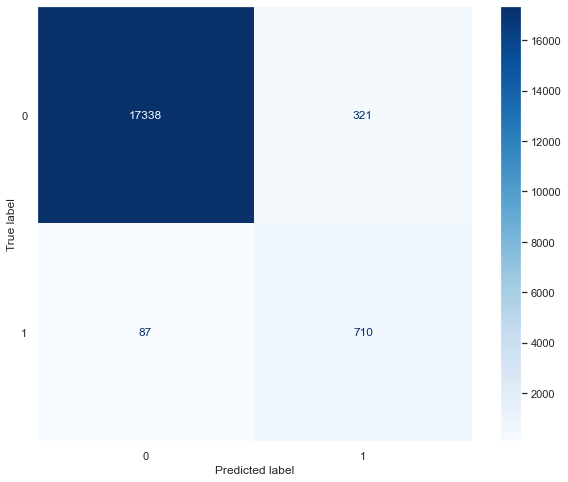

In [88]:
print('Test Accuracy Score:', xgb_baseline_test.score(X_test, y_test))
print('Recall Score:', recall_score(y_true = y_test, y_pred = y_preds))
print('Precision Score:', precision_score(y_true = y_test, y_pred = y_preds))
print('ROC AUC score:', roc_auc_score(y_true = y_test, y_score = y_proba[:, 1]))
plot_confusion_matrix(xgb_baseline_test, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.show()

## XGBoost Test (tuned hyperparameters)

In [89]:
%%time

xgb_tuned_test =xgb.XGBClassifier(random_state=0, learning_rate=0.01,
                                  eval_metric = 'logloss', use_label_encoder = False,
                                  max_depth = 3, n_estimators = 50)
xgb_tuned_test.fit(X_train,np.ravel(y_train))

Wall time: 685 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [90]:
pickle_out = open("xgb_tuned_test.p", "wb" )
pickle.dump(xgb_tuned_test, pickle_out)
pickle_out.close()

In [91]:
y_preds = xgb_tuned_test.predict(X_test)
y_proba = xgb_tuned_test.predict_proba(X_test)

Test Accuracy Score: 0.9764304291287387
Recall Score: 0.9297365119196989
Precision Score: 0.6616071428571428
ROC AUC score: 0.9691228425185532


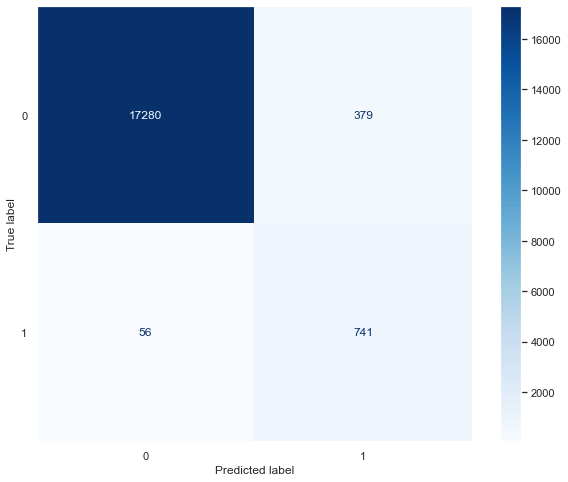

In [92]:
print('Test Accuracy Score:', xgb_tuned_test.score(X_test, y_test))
print('Recall Score:', recall_score(y_true = y_test, y_pred = y_preds))
print('Precision Score:', precision_score(y_true = y_test, y_pred = y_preds))
print('ROC AUC score:', roc_auc_score(y_true = y_test, y_score = y_proba[:, 1]))
plot_confusion_matrix(xgb_tuned_test, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.show()

### Observation: The tuned XGBoost model did indeed have a higher recall than the baseline XGBoost model, and produced a high recall score of 0.94.

In [93]:
xgb_tuned_test.feature_importances_

array([0.10378575, 0.89502907, 0.00118515], dtype=float32)

In [94]:
print('Feature Importances: \n')
for col,score in zip(X_train.columns,xgb_tuned_test.feature_importances_):
    print(col,':',score)

Feature Importances: 

Top Category Views and Carts Count : 0.10378575
Cart_Quantity : 0.89502907
Duration_seconds : 0.0011851547


### <font color = 'red'> Insight: We can see that the most important feature of the three features, by far, is the cart quantity. It is roughly 10 times more important than the next most important feature, the number of views/carts actions for the top viewed/carted product category in the user sessions. Therefore, our marketing strategy should be targeted at users who have placed items into their carts. </font>

### Checking if the model simply categorised all rows with Cart_Quantity > 0 as purchases:

### True Positives:

In [95]:
tn_plus_tp = pd.concat([X_test[y_test == y_preds], y_test[y_test == y_preds]], axis =1)

In [96]:
tn_plus_tp

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625532127652_2020-10-30,1,0,0.0,0
1515915625526384026_2020-10-15,10,1,526.0,1
1515915625526031024_2020-10-16,1,0,0.0,0
1515915625523215531_2020-10-07,1,0,0.0,0
1515915625492654760_2020-10-03,3,1,60.0,1
...,...,...,...,...
1515915625522835427_2020-10-06,1,0,0.0,0
1515915625530192520_2020-10-27,1,0,0.0,0
1515915625532322114_2020-10-30,1,0,0.0,0
1515915625526491506_2020-10-15,3,0,346.0,0


In [97]:
tn_plus_tp[tn_plus_tp['Purchased']==1]

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625526384026_2020-10-15,10,1,526.0,1
1515915625492654760_2020-10-03,3,1,60.0,1
1515915625525625987_2020-10-15,5,1,7523.0,1
1515915625529608943_2020-10-30,5,1,7768.0,1
1515915625530110581_2020-10-24,9,2,2519.0,1
...,...,...,...,...
1515915625530473711_2020-10-25,4,1,272.0,1
1515915625522892923_2020-10-06,4,1,430.0,1
1515915625532579324_2020-10-31,4,1,295.0,1
1515915625530164007_2020-10-25,8,1,28814.0,1


In [98]:
tn_plus_tp.query('Cart_Quantity==0 & Purchased==1')

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased


In [99]:
tn_plus_tp[tn_plus_tp['Purchased']==1].Duration_seconds.describe()

count      741.000000
mean      4131.944669
std       9914.111815
min         34.000000
25%        232.000000
50%        601.000000
75%       2133.000000
max      72625.000000
Name: Duration_seconds, dtype: float64

### Observation: All the correctly predicted purchases were preceded by the addition of items to the cart

### False Negatives:

In [100]:
fn_plus_fp = pd.concat([X_test[y_test != y_preds], y_test[y_test != y_preds]], axis =1)

In [101]:
fn_plus_fp

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625522731806_2020-10-05,4,1,313.0,0
1515915625523112589_2020-10-20,3,1,273.0,0
1515915625526931528_2020-10-17,5,1,927.0,0
1515915625532681097_2020-10-31,7,1,1347.0,0
1515915625522967433_2020-10-06,1,0,0.0,1
...,...,...,...,...
1515915625531435562_2020-10-28,5,1,1333.0,0
1515915625521466215_2020-10-01,1,0,0.0,1
1515915625532088084_2020-10-30,3,1,154.0,0
1515915625529886963_2020-10-24,13,1,34644.0,0


In [102]:
false_negatives = fn_plus_fp[fn_plus_fp['Purchased'] == 1]

In [103]:
false_negatives

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625522967433_2020-10-06,1,0,0.0,1
1515915625521564792_2020-10-01,1,0,0.0,1
1515915625525911482_2020-10-14,4,0,683.0,1
1515915625528695066_2020-10-21,5,0,200.0,1
1515915625531508998_2020-10-29,1,0,0.0,1
1515915625522887421_2020-10-06,2,0,534.0,1
1515915625530436585_2020-10-27,6,0,2200.0,1
1515915625528942295_2020-10-28,4,0,4271.0,1
1515915625523851549_2020-10-09,3,0,204.0,1
1515915625529930982_2020-10-24,1,0,0.0,1


In [104]:
false_negatives.shape

(56, 4)

In [105]:
false_negatives.query('Cart_Quantity==0 & Purchased==1').shape

(56, 4)

In [106]:
false_negatives.Duration_seconds.describe()

count       56.000000
mean      1344.714286
std       3321.866818
min          0.000000
25%          0.000000
50%        162.000000
75%        920.250000
max      17044.000000
Name: Duration_seconds, dtype: float64

### Observation: The model was not able to predict the purchases when the customer did not put the item into their cart but instead clicked on the option to purchase the item immediately.

### True Negatives:

In [107]:
tn_plus_tp[tn_plus_tp['Purchased']==0]

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625532127652_2020-10-30,1,0,0.0,0
1515915625526031024_2020-10-16,1,0,0.0,0
1515915625523215531_2020-10-07,1,0,0.0,0
1515915625407060623_2020-10-02,1,0,0.0,0
1515915625523853890_2020-10-09,2,0,76.0,0
...,...,...,...,...
1515915625522835427_2020-10-06,1,0,0.0,0
1515915625530192520_2020-10-27,1,0,0.0,0
1515915625532322114_2020-10-30,1,0,0.0,0
1515915625526491506_2020-10-15,3,0,346.0,0


In [108]:
tn_cart_nopurchase = tn_plus_tp.query('Cart_Quantity>0 & Purchased==0')
tn_cart_nopurchase

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625531199845_2020-10-28,2,1,36.0,0
1515915625524349542_2020-10-10,2,1,29.0,0
1515915625524679838_2020-10-11,2,1,52.0,0
1515915625526843850_2020-10-16,2,1,8.0,0
1515915625526514096_2020-10-15,2,1,12.0,0
...,...,...,...,...
1515915625531809762_2020-10-29,2,1,47.0,0
1515915625522266325_2020-10-04,2,1,102.0,0
1515915625492116211_2020-10-06,2,1,49.0,0
1515915625524490154_2020-10-11,2,1,127.0,0


In [109]:
tn_cart_nopurchase.Cart_Quantity.value_counts()

1    239
2      3
Name: Cart_Quantity, dtype: int64

In [110]:
tn_cart_nopurchase['Top Category Views and Carts Count'].value_counts()

2    242
Name: Top Category Views and Carts Count, dtype: int64

In [111]:
tn_cart_nopurchase.Duration_seconds.describe()

count     242.000000
mean      102.508264
std       226.291595
min         1.000000
25%        17.000000
50%        43.500000
75%        98.750000
max      1915.000000
Name: Duration_seconds, dtype: float64

### Observation: The model managed to accurately predict 242 cases where items were added to the cart, but purchasing intent was low and no purchase was made eventually

### False Positives:

In [112]:
false_positives = fn_plus_fp[fn_plus_fp['Purchased'] == 0]

In [113]:
false_positives

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625522731806_2020-10-05,4,1,313.0,0
1515915625523112589_2020-10-20,3,1,273.0,0
1515915625526931528_2020-10-17,5,1,927.0,0
1515915625532681097_2020-10-31,7,1,1347.0,0
1515915625526614663_2020-10-16,4,1,154.0,0
...,...,...,...,...
1515915625527081117_2020-10-24,4,1,395.0,0
1515915625531435562_2020-10-28,5,1,1333.0,0
1515915625532088084_2020-10-30,3,1,154.0,0
1515915625529886963_2020-10-24,13,1,34644.0,0


In [114]:
false_positives.query('Cart_Quantity>0 & Purchased==0')

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625522731806_2020-10-05,4,1,313.0,0
1515915625523112589_2020-10-20,3,1,273.0,0
1515915625526931528_2020-10-17,5,1,927.0,0
1515915625532681097_2020-10-31,7,1,1347.0,0
1515915625526614663_2020-10-16,4,1,154.0,0
...,...,...,...,...
1515915625527081117_2020-10-24,4,1,395.0,0
1515915625531435562_2020-10-28,5,1,1333.0,0
1515915625532088084_2020-10-30,3,1,154.0,0
1515915625529886963_2020-10-24,13,1,34644.0,0


In [115]:
false_positives.query('Cart_Quantity>0 & Purchased==0').Cart_Quantity.value_counts()

1     314
2      37
3      13
4       5
5       3
7       2
8       2
6       1
14      1
17      1
Name: Cart_Quantity, dtype: int64

In [116]:
false_positives.query('Cart_Quantity>0 & Purchased==0')['Top Category Views and Carts Count'].value_counts()

3     166
4      88
5      36
6      22
7      22
8      16
11      6
12      5
10      4
13      4
9       3
14      2
19      2
15      1
30      1
63      1
Name: Top Category Views and Carts Count, dtype: int64

In [117]:
false_positives.query('Cart_Quantity>0 & Purchased==0').Duration_seconds.describe()

count      379.000000
mean      2534.395778
std       6880.026319
min         11.000000
25%        119.500000
50%        349.000000
75%       1331.000000
max      52893.000000
Name: Duration_seconds, dtype: float64

### Observation: All False Positives were sessions when items were added to the cart, but no purchase was made eventually. 

### Conclusion: Although the model is able to predict low purchasing intent even though items were added to the cart, the model is not able to predict purchasing intent if no items are added to the cart.

### Comparing the aggregate statistics of the other two features 'Top Category Views and Carts Count' and 'Duration_seconds', we see that the False Positives had higher value counts for 'Top Category Views and Carts Count' higher mean, minimum, and maximum for 'Duration_seconds' than the 242 cases where items were added to the cart but purchasing intent was predicted to be low.

## Abandoned Carts

In [118]:
abandoned_carts = pd.concat([tn_cart_nopurchase, false_positives])

In [119]:
abandoned_carts

,Top Category Views and Carts Count,Cart_Quantity,Duration_seconds,Purchased
1515915625531199845_2020-10-28,2,1,36.0,0
1515915625524349542_2020-10-10,2,1,29.0,0
1515915625524679838_2020-10-11,2,1,52.0,0
1515915625526843850_2020-10-16,2,1,8.0,0
1515915625526514096_2020-10-15,2,1,12.0,0
...,...,...,...,...
1515915625527081117_2020-10-24,4,1,395.0,0
1515915625531435562_2020-10-28,5,1,1333.0,0
1515915625532088084_2020-10-30,3,1,154.0,0
1515915625529886963_2020-10-24,13,1,34644.0,0


In [120]:
abandoned_carts_with_value = user_date_activity.loc[abandoned_carts.index]

In [121]:
abandoned_carts_with_value['Cart Value'].describe()

count     621.000000
mean      141.613897
std       289.938463
min         1.570000
25%        23.750000
50%        59.990000
75%       164.920000
max      3939.970000
Name: Cart Value, dtype: float64

# --- End ---